In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from datetime import date

import sys

In [2]:
num_f = ['model_age', 'm_from_car_reg', 'power_kw', 'mileage_in_km']
cat_f = ['brand', 'model', 'color', 'transmission_type', 'fuel_type']
target = ['price_in_euro']
preprocessed_data = '../data/car-price-processed-data.parquet'

In [3]:
def load_data(file_name, price_lower_threshold = 500, price_upper_threshold = 500000, milage_lower_threshold = 0, milage_upper_threshold = 400000):
    #read the file to dataframe
    df = pd.read_csv(file_name)

    today = date.today()
    
    #cleansing year: non digit values and values out of range
    df = df[df['year'].apply(lambda x:x.isdigit())]
    df['year'] = df['year'].astype(int) 
    df = df[df['year'].apply(lambda x:x>=1995 and x<=int(today.year))]
    
    #registration date transformation to datatime type
    df['registration_date'] = pd.to_datetime(df['registration_date'])
    
    #remove power_kw records with NaN, types convertions
    df = df[df['power_kw'].apply(lambda x: str(x) != 'nan')]
    df['power_kw'] = df['power_kw'].astype(int)
    
    #remove records with NaN mileage
    df = df[df['mileage_in_km'].apply(lambda x: str(x) != 'nan')]
    df = df[(df['mileage_in_km'] >= milage_lower_threshold) & (df['mileage_in_km'] <= milage_upper_threshold)]
    
    #remove price records with NaN, types convertions, remove outliers
    df = df[df['price_in_euro'].apply(lambda x: str(x) != 'nan')]
    df['price_in_euro'] = df['price_in_euro'].astype(int)
    df = df[(df['price_in_euro'] >= price_lower_threshold) & (df['price_in_euro'] <= price_upper_threshold)]
    
    #remove records with NaN, types convertions for categorical features
    df['brand'] = df['brand'].astype(str)
    df['model'] = df['model'].astype(str)
    df['color'] = df['color'].astype(str)
    df['transmission_type'] = df['transmission_type'].astype(str)
    df['fuel_type'] = df['fuel_type'].astype(str)
    df = df[df['brand'].apply(lambda x: str(x) != 'nan')]
    df = df[df['model'].apply(lambda x: str(x) != 'nan')]
    df = df[df['color'].apply(lambda x: str(x) != 'nan')]
    df = df[df['transmission_type'].apply(lambda x: str(x) != 'nan')]
    df = df[df['fuel_type'].apply(lambda x: str(x) != 'nan')]
  
    return df

In [4]:
def feature_eng(df):
    today = date.today()    
    
    #calculation of model age: current year - year in years
    df['model_age'] = df['year'].apply(lambda x:int(today.year)-x)
    
    #calculation of months from gegistration till now attribute
    df['m_from_car_reg'] = df['registration_date'].apply(lambda x: (int(today.year) - x.year)*12 + int(today.month) - x.month)
    #do not take cars with registration in the future
    df = df[df['m_from_car_reg'].apply(lambda x:x>=0)]
        
    return df[cat_f+num_f+target]

In [5]:
#loading data
df1 = load_data('../data/car-price-raw-data.csv', price_lower_threshold = 1000, price_upper_threshold = 100000)
df1 = feature_eng(df1)

In [6]:
df1.dtypes

brand                 object
model                 object
color                 object
transmission_type     object
fuel_type             object
model_age              int64
m_from_car_reg         int64
power_kw               int64
mileage_in_km        float64
price_in_euro          int64
dtype: object

In [19]:
df1['transmission_type'].unique()

array(['Manual', 'Unknown', 'Automatic', 'Semi-automatic'], dtype=object)

In [18]:
brand_model_dict = df1.groupby('brand')['model'].unique().apply(list).to_dict()

print(brand_model_dict)

{'alfa-romeo': ['Alfa Romeo GTV', 'Alfa Romeo 164', 'Alfa Romeo Spider', 'Alfa Romeo 145', 'Alfa Romeo 155', 'Alfa Romeo 146', 'Alfa Romeo', 'Alfa Romeo 156', 'Alfa Romeo 166', 'Alfa Romeo 147', 'Alfa Romeo Alfa 6', 'Alfa Romeo GT', 'Alfa Romeo 159', 'Alfa Romeo Brera', 'Alfa Romeo Sportwagon', 'Alfa Romeo MiTo', 'Alfa Romeo Giulietta', 'Alfa Romeo 4C', 'Alfa Romeo Giulia', 'Alfa Romeo Stelvio', 'Alfa Romeo Tonale'], 'aston-martin': ['Aston Martin DB7', 'Aston Martin Vanquish', 'Aston Martin DB9', 'Aston Martin V8', 'Aston Martin Vantage', 'Aston Martin DBS', 'Aston Martin Rapide', 'Aston Martin', 'Aston Martin Virage', 'Aston Martin DB11'], 'audi': ['Audi A4', 'Audi A6', 'Audi A8', 'Audi S8', 'Audi Cabriolet', 'Audi A3', 'Audi 80', 'Audi TT', 'Audi S6', 'Audi S3', 'Audi S4', 'Audi A2', 'Audi Allroad', 'Audi RS4', 'Audi A6 allroad', 'Audi RS6', 'Audi A5', 'Audi Q7', 'Audi QUATTRO', 'Audi S5', 'Audi R8', 'Audi TTS', 'Audi Q5', 'Audi A4 allroad', 'Audi TT RS', 'Audi A1', 'Audi A7', 'Audi

<Axes: ylabel='Density'>

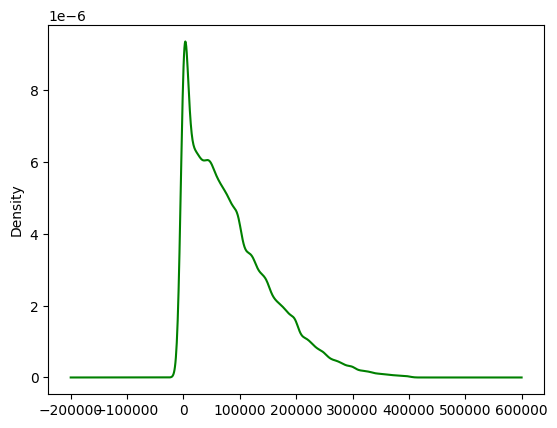

In [8]:
d = df1['mileage_in_km']
#Plot weight
df1.mileage_in_km.plot.density(color='green')

In [9]:
df1

,brand,model,color,transmission_type,fuel_type,model_age,m_from_car_reg,power_kw,mileage_in_km,price_in_euro
0,alfa-romeo,Alfa Romeo GTV,red,Manual,Petrol,28,333,148,160500.0,1300
1,alfa-romeo,Alfa Romeo 164,black,Manual,Petrol,28,341,191,190000.0,24900
2,alfa-romeo,Alfa Romeo Spider,black,Unknown,Petrol,28,341,110,129000.0,5900
3,alfa-romeo,Alfa Romeo Spider,black,Manual,Petrol,28,336,110,189500.0,4900
4,alfa-romeo,Alfa Romeo 164,red,Manual,Petrol,27,320,132,96127.0,17950
...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,Automatic,Hybrid,0,3,192,1229.0,57990
251075,volvo,Volvo XC90,white,Automatic,Diesel,0,4,173,4900.0,89690
251076,volvo,Volvo V60,white,Automatic,Diesel,0,2,145,1531.0,61521
251077,volvo,Volvo XC40,white,Automatic,Hybrid,0,2,132,1500.0,57890


In [10]:
df1.to_parquet(preprocessed_data)